## Import Libraries :

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

## Read The Dataset :

In [105]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.shape

(891, 12)

## Data PreProcessing :

#### Checking & Treating Missing Values :

In [107]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df.drop(columns='Cabin', inplace=True)

In [109]:
df.dropna(inplace=True)

In [110]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Checking Duplicate Values :

In [111]:
df.duplicated().sum()

0

#### Checking the Dataset Info :

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


#### Check Statistics summary of Data :

In [113]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking DataTypes of Columns :

In [114]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [115]:
df.head()                                 ## 1 for Survived & 0 for Not Survived..

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Seperate Numerical And Categorical Features :

In [116]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print('Cat_Cols => ', cat_cols)
print('Num_Cols => ', num_cols)

Cat_Cols =>  Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')
Num_Cols =>  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


### EDA : 

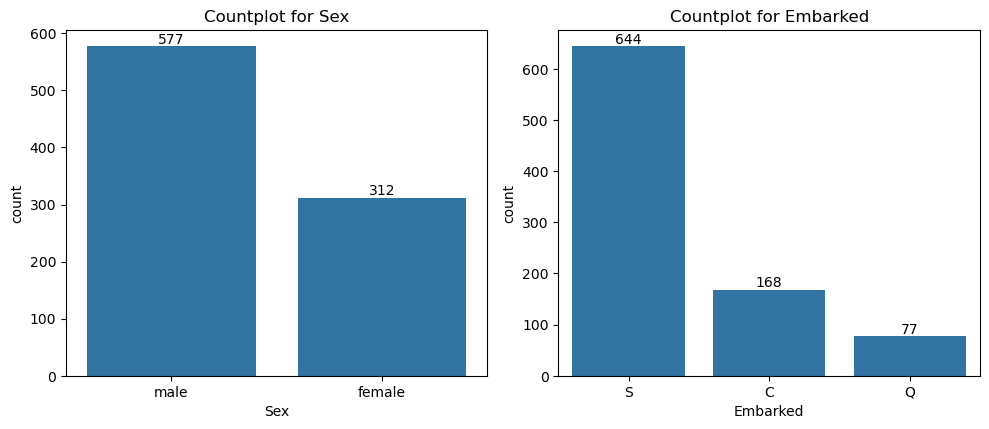

In [117]:
## CATEGORICAL COLUMNS :

cols = ['Sex', 'Embarked']
plt.figure(figsize=(10,8))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.tight_layout()
    plt.title(f'Countplot for {cols[i]}')
plt.show()

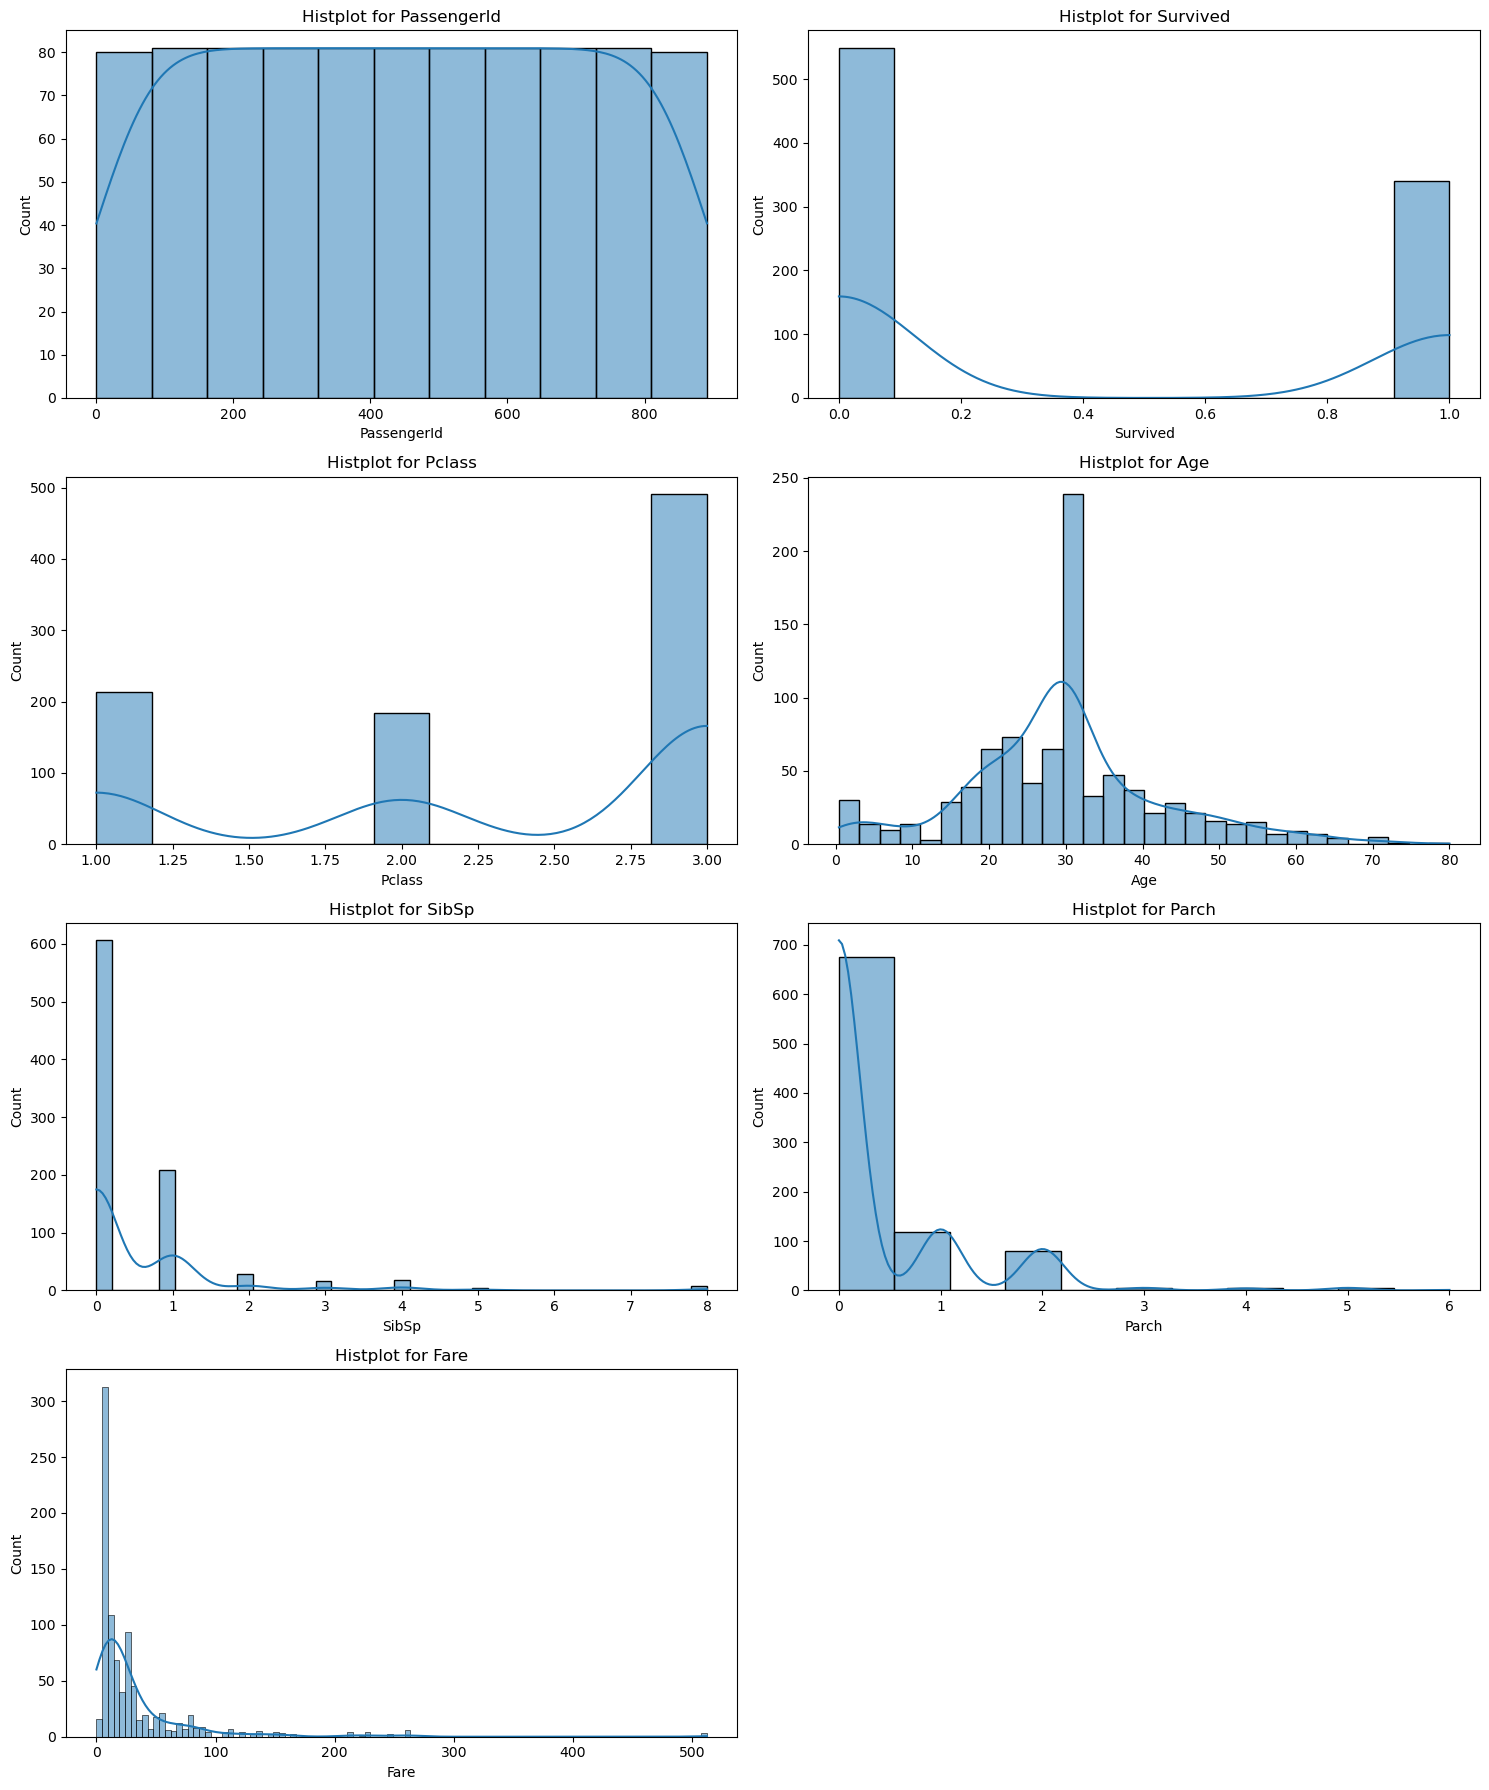

In [118]:
## NUMERICAL COLUMNS : 

plt.figure(figsize=(15,18))
for i in range(len(num_cols)):
    plt.subplot(4,2,i+1)
    sns.histplot(x=df[num_cols[i]],kde=True)
    plt.tight_layout()
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

### Collective data analysis :

count
Survived Pclass       
0        3         372
         2          97
         1          80
1        1         134
         3         119
         2          87

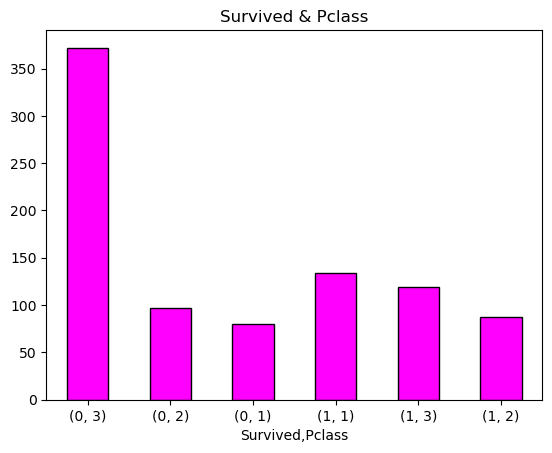

In [119]:
## Survived & Pclass :                                               ## 1 for Survived & 0 for Not Survived..

x = df.groupby(['Survived'])['Pclass'].value_counts()
x.plot(kind='bar', color='magenta', edgecolor='black')
plt.title('Survived & Pclass')
plt.xticks(rotation=0) 
pd.DataFrame(x)

count
Survived Sex          
0        male      468
         female     81
1        female    231
         male      109

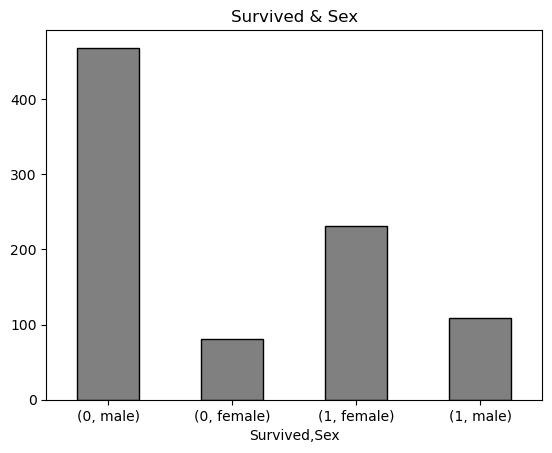

In [120]:
## Survived & Sex :                                                ## 1 for Survived & 0 for Not Survived..

x = df.groupby(['Survived'])['Sex'].value_counts()
x.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Survived & Sex')
plt.xticks(rotation=0)
pd.DataFrame(x)

count
Survived Embarked       
0        S           427
         C            75
         Q            47
1        S           217
         C            93
         Q            30

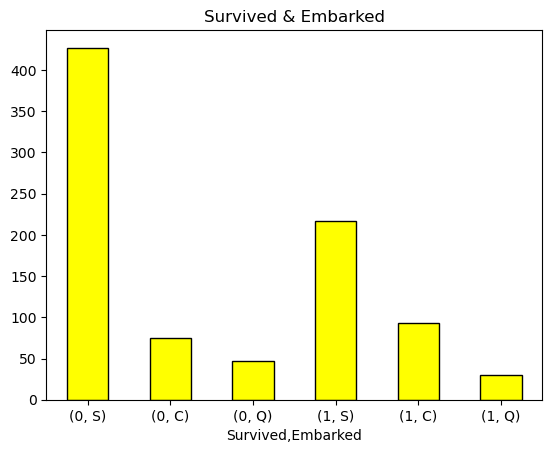

In [121]:
## Survived & Embarked :                                             ## 1 for Survived & 0 for Not Survived..

x = df.groupby(['Survived'])['Embarked'].value_counts()
x.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Survived & Embarked')
plt.xticks(rotation=0)
pd.DataFrame(x)

In [122]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Dropping Unnecessary Columns :

In [123]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [125]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Encoding :

In [126]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])                                 ## 1 -> Male , 0 -> Female
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])                       ## 0 -> C , 1 -> Q , 2 -> S
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Seperate x and y variables :

In [128]:
x = df.drop(columns='Survived',axis=1)
y = df['Survived']

## Split Train and Test Data :

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=43)
print('x_train =>', x_train.shape)
print('x_test =>', x_test.shape)
print('y_train =>', y_train.shape)
print('y_test =>', y_test.shape)

x_train => (711, 7)
x_test => (178, 7)
y_train => (711,)
y_test => (178,)


### Correlation Analysis :

In [83]:
corrcolumns = df.drop(columns=['Embarked','Sex'])

In [84]:
corrcolumns.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


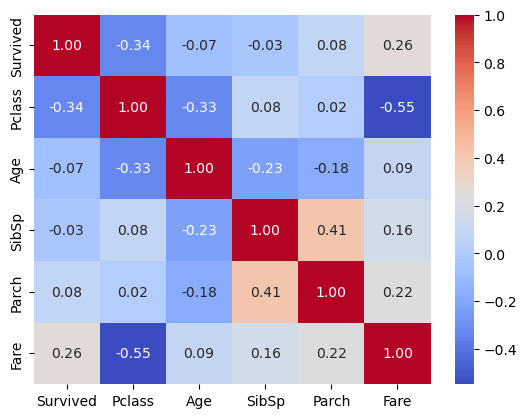

In [86]:
sns.heatmap(corrcolumns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Model :

In [99]:
def eval_model(y_test, ypred):
    MAE = mean_absolute_error(y_test, ypred)         
    MSE = mean_squared_error(y_test, ypred)          
    RMSE = np.sqrt(MSE)                             
    r2 = r2_score(y_test, ypred)                     
    print('MAE',MAE,'MSE',MSE,'RMSE',RMSE)
    print('Test_R2', r2)

## Logistic Regression Model

In [101]:
lr = LogisticRegression()       ## create an instance of linear regression
lr.fit(x_train,y_train)       ## Train model on x_train and y_train

LogisticRegression()

In [102]:
ypred_lr = lr.predict(x_test)
eval_model(y_test,ypred_lr)

MAE 0.1797752808988764 MSE 0.1797752808988764 RMSE 0.423999152002544
Test_R2 0.23850267379679146


In [103]:
print('Train Score',lr.score(x_train,y_train))          ## Train R2_Score
print('Test Score',lr.score(x_test,y_test))             ## Test R2_Score

Train Score 0.7974683544303798
Test Score 0.8202247191011236


In [131]:
print(confusion_matrix(y_test, ypred_lr))
print(classification_report(y_test, ypred_lr))

[[97 13]
 [19 49]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.75        68

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178

